In [94]:
import pandas as pd
import statistics as st
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, DBSCAN 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering 
from sklearn.neighbors import NearestNeighbors 
import numpy as np
from sklearn import metrics 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**PROBLEM STATEMENT :**
Employees are being absent during working hours and affecting the department's progress.
**OBJECTIVE :**
Identifying reasons why employees are being absent.

In [95]:
df = pd.read_csv("C:/Users/user/Downloads/Datasets/DS_C12_S3_Clustering_AbsenteeismAtWork_Data.csv", sep =';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [96]:
df.loc[:,['Hit target']].head()

,Hit target
0,97
1,97
2,97
3,97
4,97


In [97]:
def whole():
    col = df.columns
    shape = df.shape
    dtyp = df.dtypes
    null = df.isnull().sum()
    info = df.info()
    desc = df.describe()
    for i in df:
        uniq = print(df[i].unique())
        
    for i in df:
        val_cnt = print(df[i].value_counts())
    
    return (col,shape,dtyp,null,info,desc,uniq,val_cnt)

In [98]:
whole()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

(Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
        'Seasons', 'Transportation expense', 'Distance from Residence to Work',
        'Service time', 'Age', 'Work load Average/day ', 'Hit target',
        'Disciplinary failure', 'Education', 'Son', 'Social drinker',
        'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
        'Absenteeism time in hours'],
       dtype='object'),
 (740, 21),
 ID                                   int64
 Reason for absence                   int64
 Month of absence                     int64
 Day of the week                      int64
 Seasons                              int64
 Transportation expense               int64
 Distance from Residence to Work      int64
 Service time                         int64
 Age                                  int64
 Work load Average/day              float64
 Hit target                           int64
 Disciplinary failure                 int64
 Education                     

**NOTE: No outlier analysis done as dataset is small and removal of values won't be convinient.**

In [99]:
df = df.drop('ID', axis='columns')

In [100]:
df2 = df.copy()

In [101]:
cat_cols = df.loc[:,['Reason for absence','Month of absence','Day of the week',
          'Seasons','Disciplinary failure', 'Education', 'Social drinker',
          'Social smoker']]
    
num_cols = df.loc[:,['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son', 
         'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']]

In [102]:
cat_cols.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker'],
      dtype='object')

In [103]:
num_cols.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [104]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

**Columns that must be treated as categorical:**

In [105]:
cat_cols

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
0,26,7,3,1,0,1,1,0
1,0,7,3,1,1,1,1,0
2,23,7,4,1,0,1,1,0
3,7,7,5,1,0,1,1,1
4,23,7,5,1,0,1,1,0
...,...,...,...,...,...,...,...,...
735,14,7,3,1,0,1,1,0
736,11,7,3,1,0,3,0,0
737,0,0,3,1,0,1,1,0
738,0,0,4,2,0,1,1,0


# Univariate

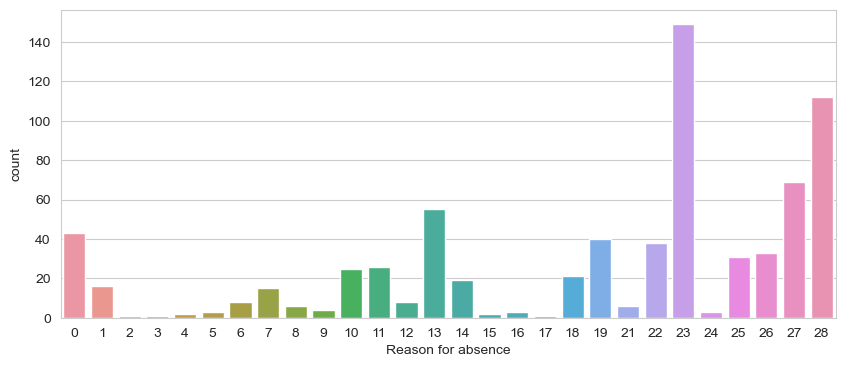

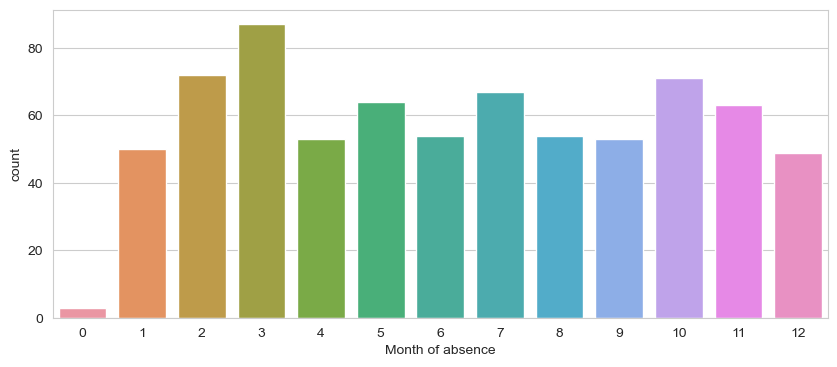

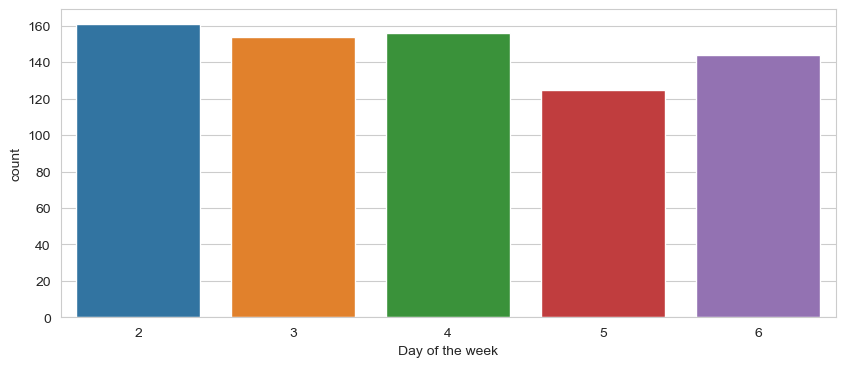

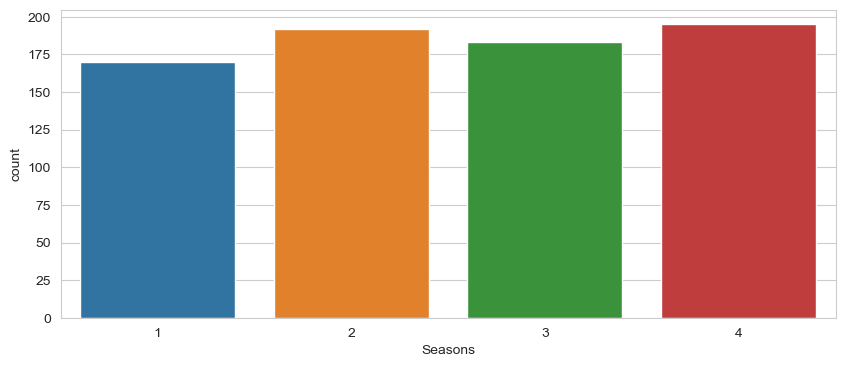

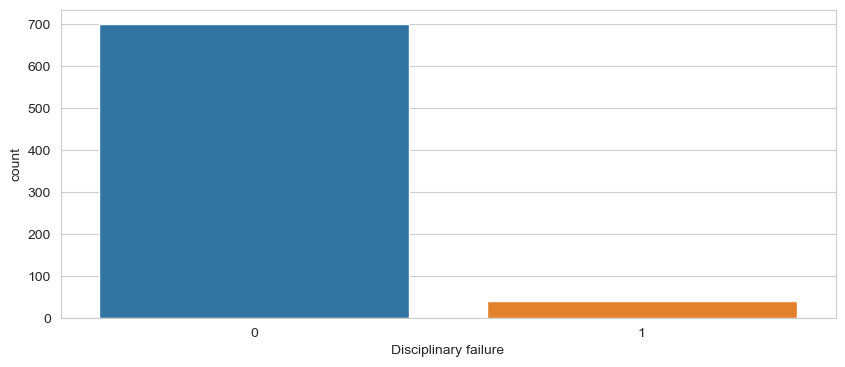

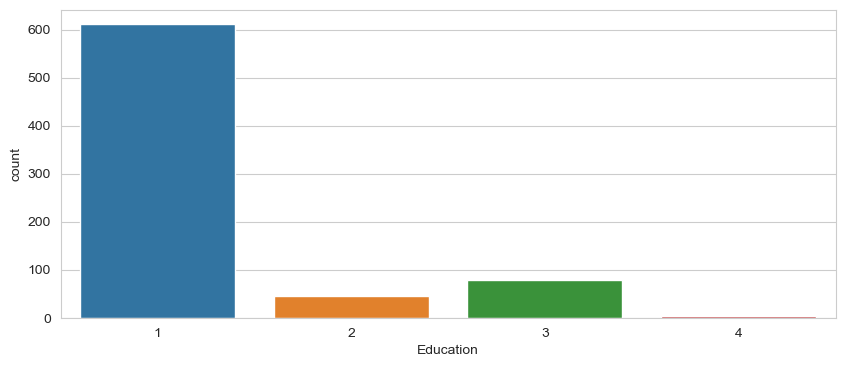

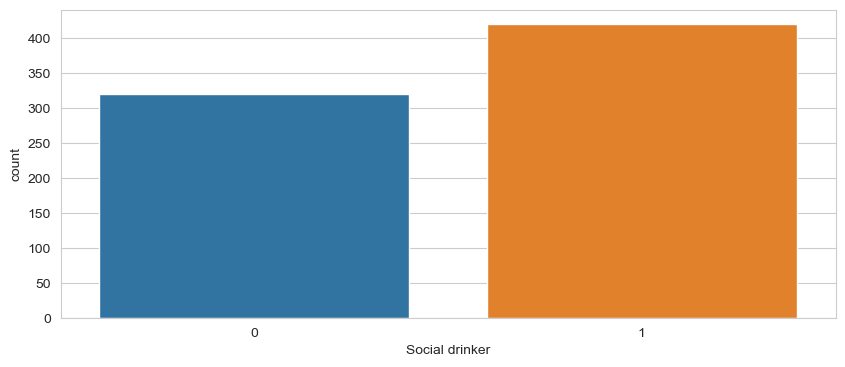

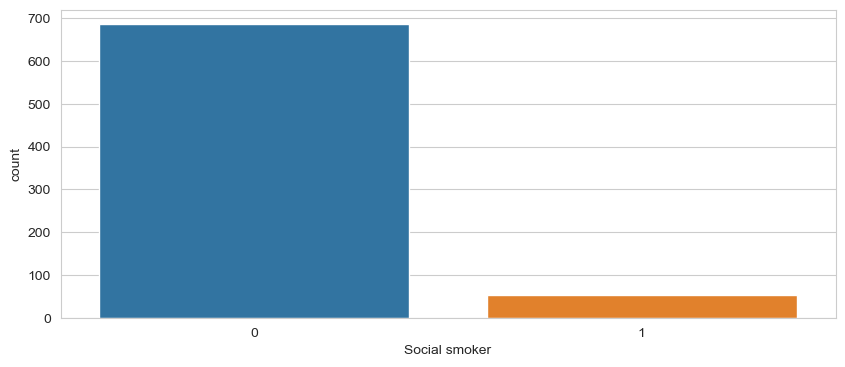

In [106]:
for i in cat_cols.columns:
    fig,ax = plt.subplots(figsize = (10,4))
    sns.set_style("whitegrid")
    sns.countplot(x = df[i])

In [107]:
df["Social drinker"].value_counts()

1    420
0    320
Name: Social drinker, dtype: int64

**Numerical columns:**

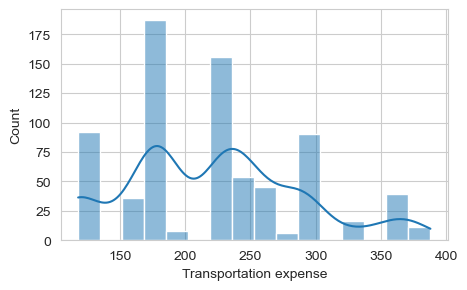

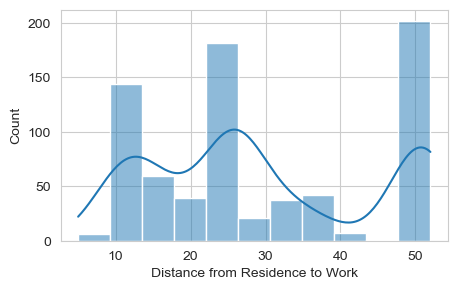

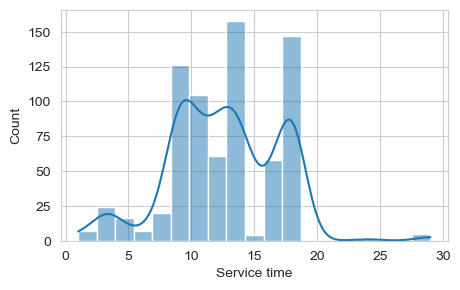

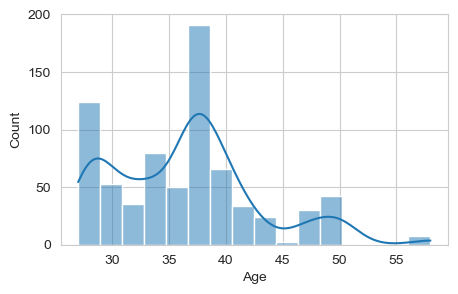

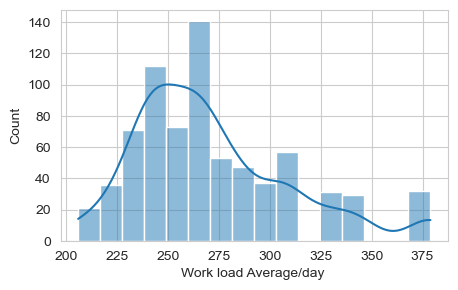

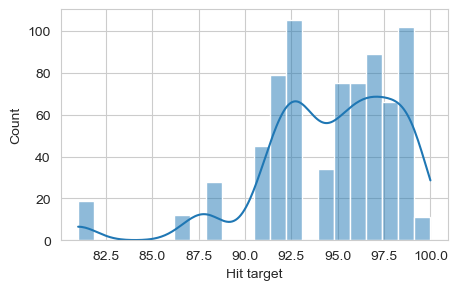

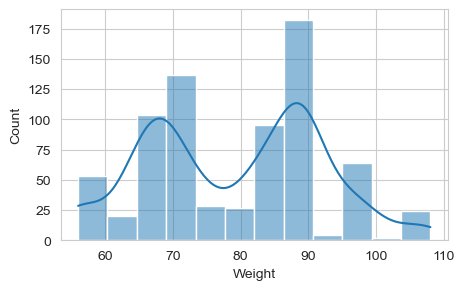

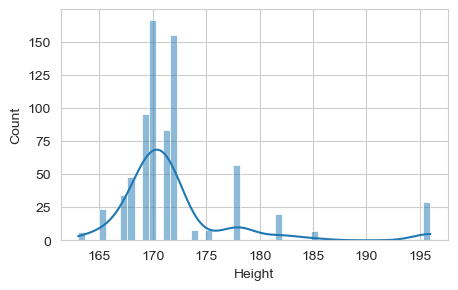

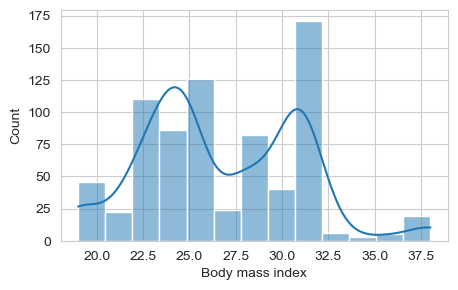

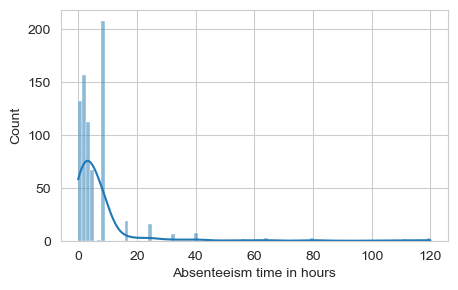

In [108]:
for i in num_cols.loc[:,['Transportation expense', 'Distance from Residence to Work',
          'Service time', 'Age', 'Work load Average/day ', 'Hit target',
          'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']]:
    fig,ax = plt.subplots(figsize = (5,3))
    sns.set_style('whitegrid')
    sns.histplot(df[i], kde = 'True')

<Axes: xlabel='Absenteeism time in hours', ylabel='Count'>

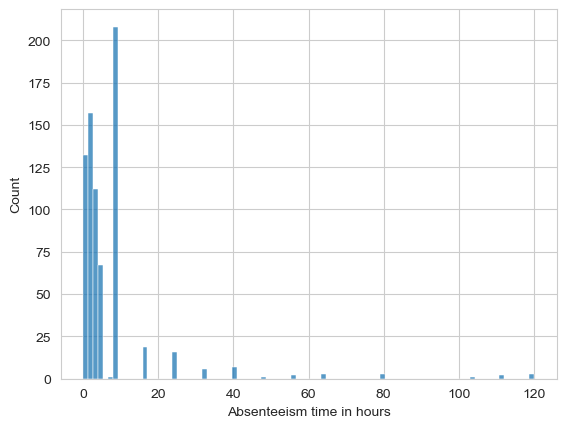

In [109]:
sns.histplot(df["Absenteeism time in hours"])

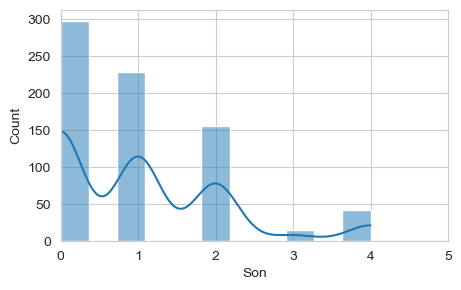

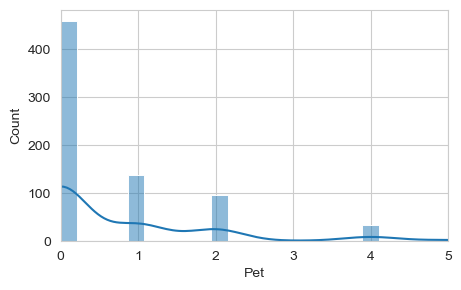

In [110]:
for i in num_cols.loc[:,["Son","Pet"]]:
    fig, ax = plt.subplots(figsize =(5,3))
    sns.histplot(df[i],kde=True)
    plt.xlim(xmin=0, xmax=5)

**INTERPRETATION: Most of the employees don't own any pets and most of them have no children.**

<Axes: >

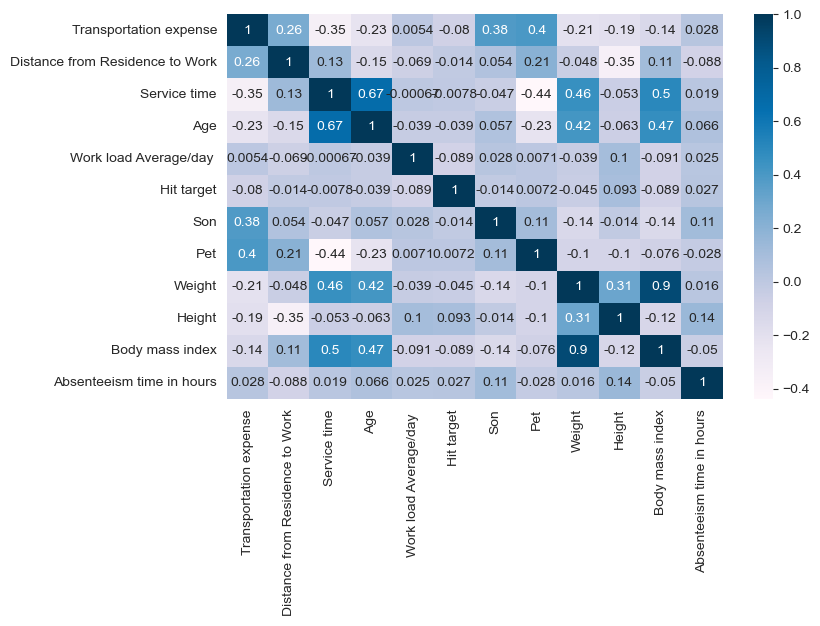

In [111]:
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(num_cols.corr(), annot=True, cmap='PuBu')

**Interpretation: The BMI is highly correlated with Weight. The age is also correlated with Service Time** 

# BIVARIATE

In [112]:
num_cols.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [113]:
cat_cols.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker'],
      dtype='object')

In [114]:
df[df["Reason for absence"]==23]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
14,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,23,4,3,3,361,52,3,28,246.288,91,0,1,1,1,0,4,80,172,27,2
685,23,5,2,3,118,13,18,50,237.656,99,0,1,1,1,0,0,98,178,31,2
698,23,5,5,3,235,16,8,32,237.656,99,0,3,0,0,0,0,75,178,25,2
702,23,5,4,3,155,12,14,34,237.656,99,0,1,2,1,0,0,95,196,25,2


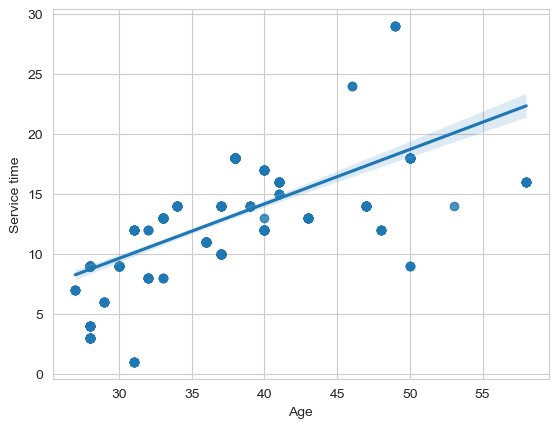

In [115]:
sns.regplot(x=df["Age"], y=df["Service time"]);

**INTERPRETATION: The service time of he employees have been increasing with the age of the employees which clearly shows that the older people are more dedicated to work as compared to the younger ones.**

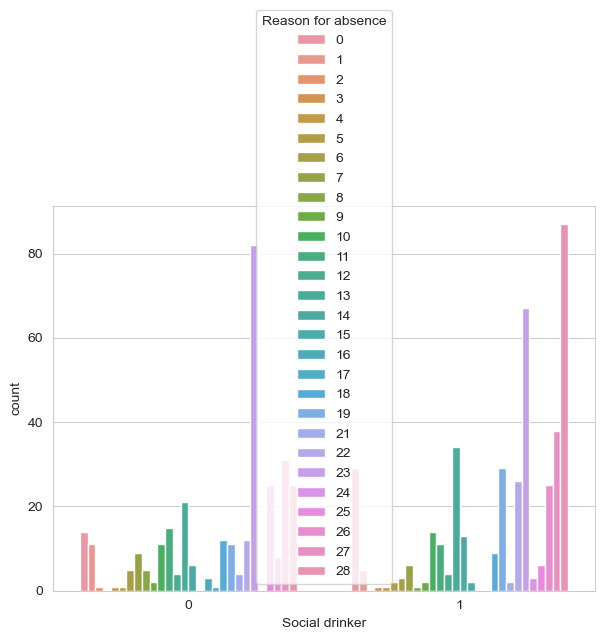

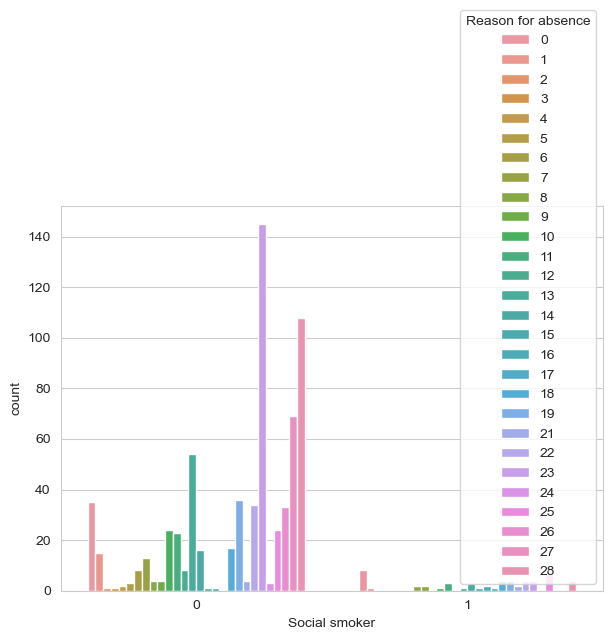

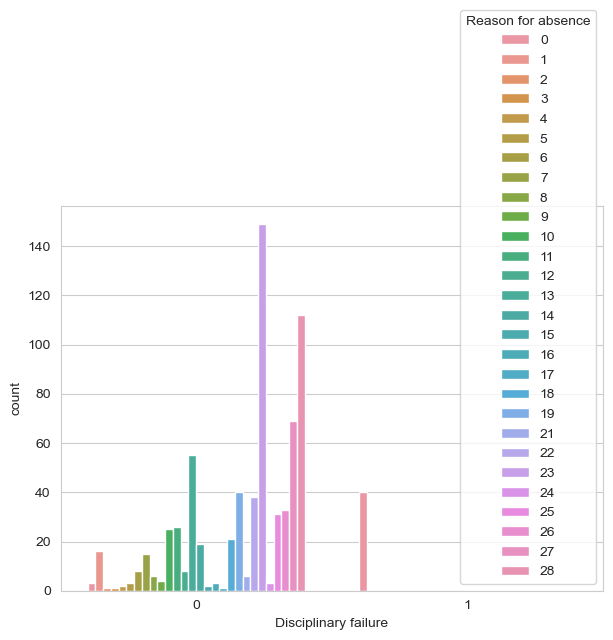

In [116]:
for i in ['Social drinker', 'Social smoker','Disciplinary failure']:
    fig,ax = plt.subplots(figsize=(7,5))
    sns.countplot(x = df[i], hue = df["Reason for absence"]);

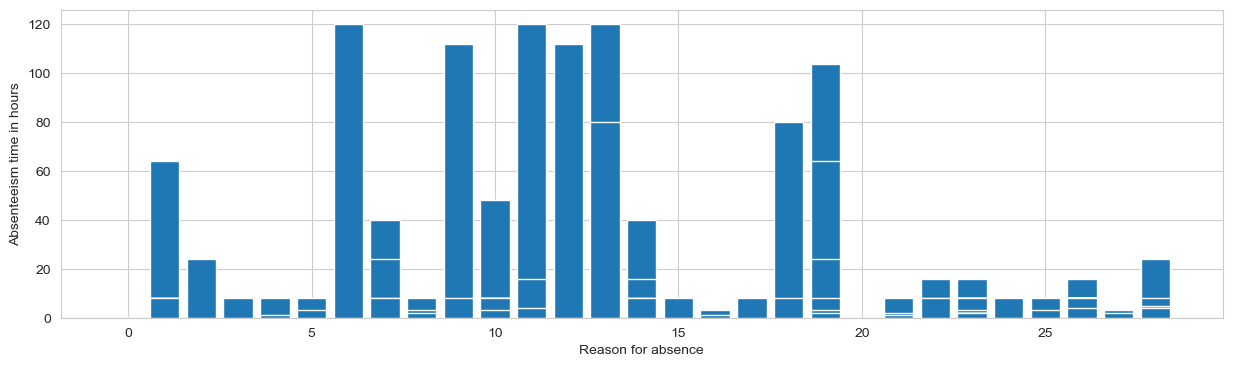

In [117]:
fig,ax = plt.subplots(figsize =(15,4))
plt.bar(df["Reason for absence"], df["Absenteeism time in hours"])
plt.xlabel("Reason for absence")
plt.ylabel("Absenteeism time in hours");

**Interpretation: Most people are absent for less than 20 hours.**

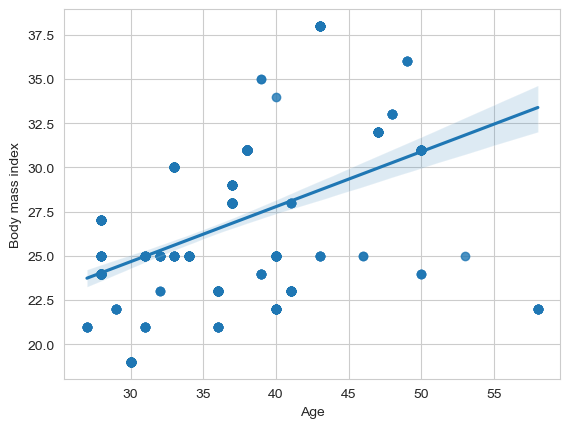

In [118]:
sns.regplot(x=df["Age"], y=df["Body mass index"]);

In [119]:
num_cols.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

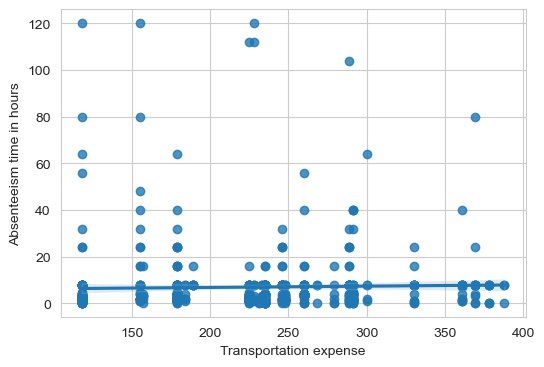

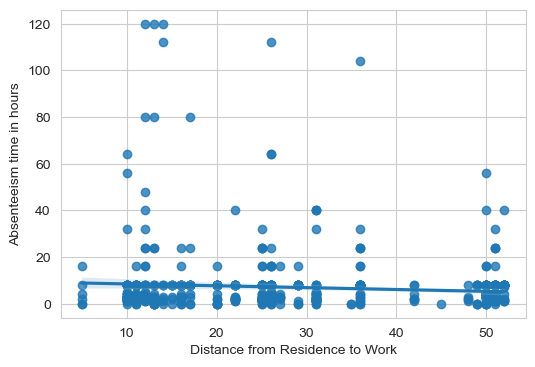

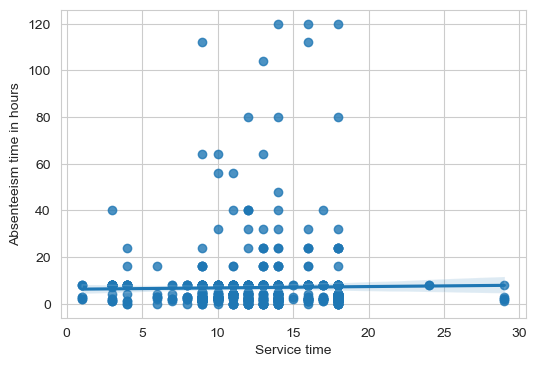

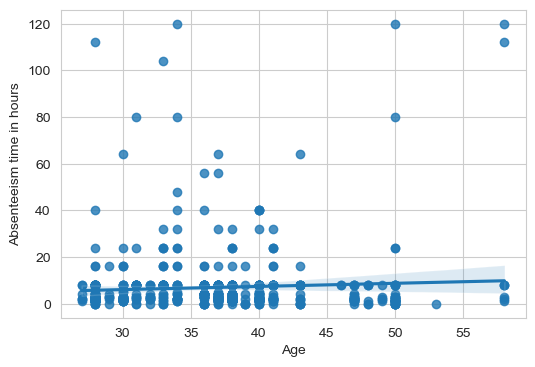

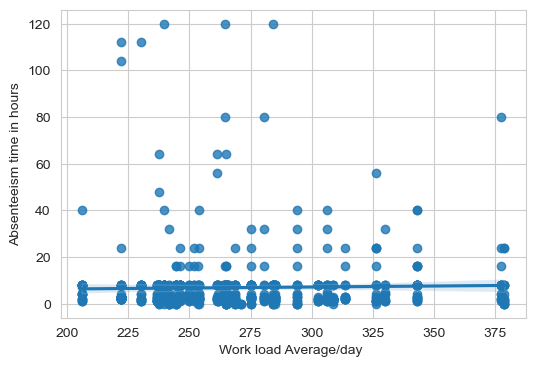

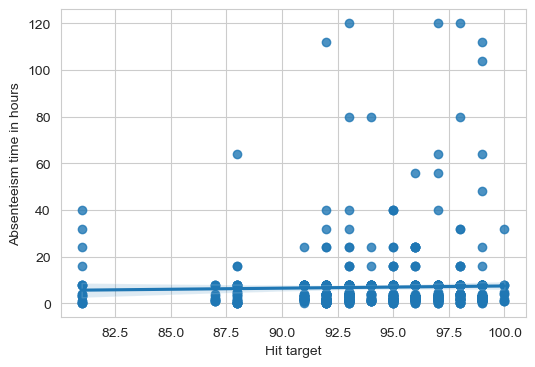

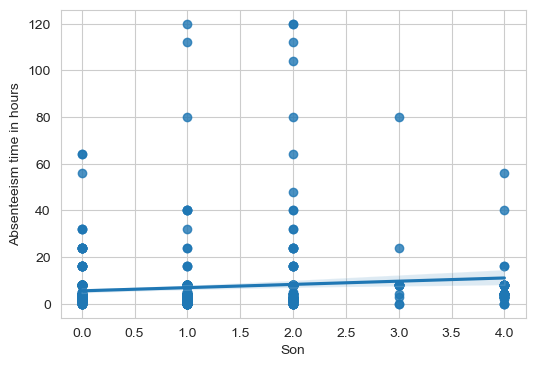

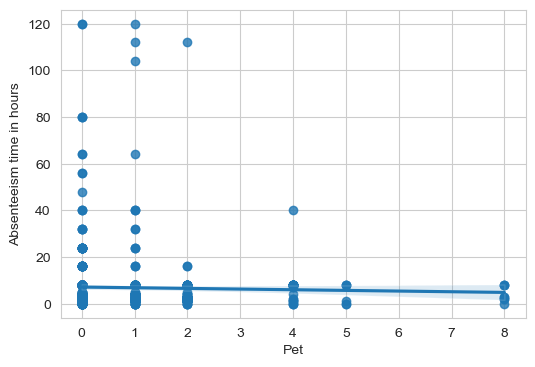

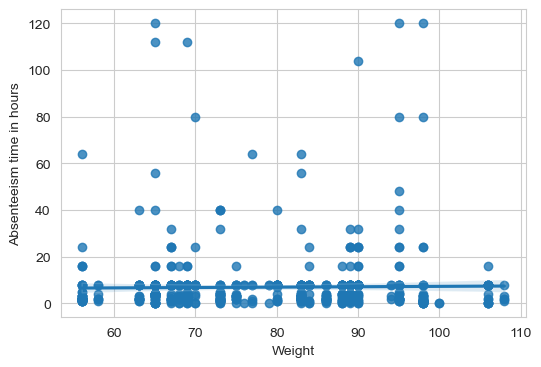

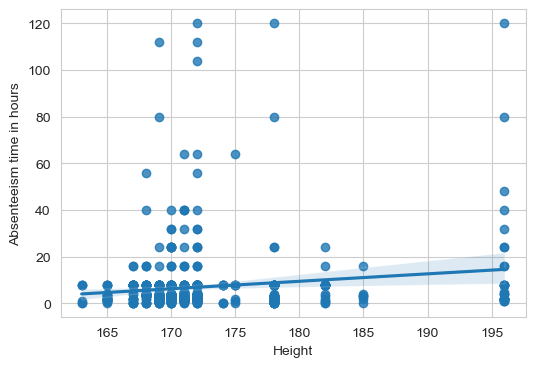

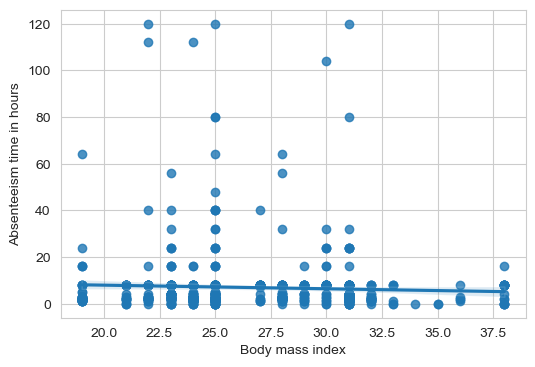

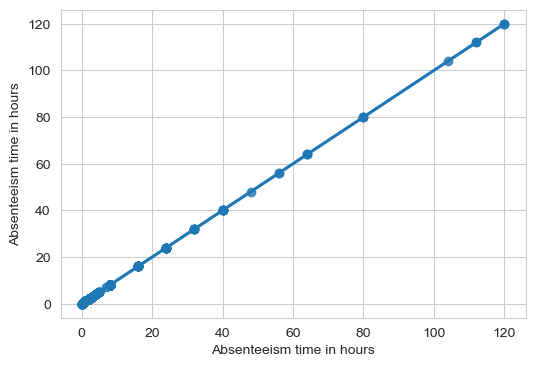

In [120]:
for i in num_cols:
    fig,ax=plt.subplots(figsize=(6,4))
    sns.regplot(x=df[i], y=df["Absenteeism time in hours"])
    plt.xlabel(i)
    plt.ylabel("Absenteeism time in hours")

In [121]:
# pip install sweetviz

import sweetviz as sv # IMPLEMENTING AUTO-EDA 
report = sv.analyze(df) 
report.show_html()

# Feature Engineering

In [122]:
le = preprocessing.LabelEncoder()
sc = StandardScaler()

for i in cat_cols:
    df[i] = le.fit_transform(df[i])
    
for i in num_cols:
    df[i] = sc.fit_transform(df[i].to_numpy().reshape(-1,1))

import time
start = time.time()
write code for model training
end = time.time()
total_time = end - start
print('Execution time:', total_time)

# Dimensionality Reduction

In [123]:
# Finalizing n components as 10
pca = PCA(n_components = 10)
pca_tr = pca.fit_transform(df)
print(sum(pca.explained_variance_ratio_)*100) # Not using dimensionality reduction concept

96.82343480499841


In [124]:
pca_tr.shape

(740, 10)

# Feature Selection

In [125]:
df2.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [126]:
num_cols.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [127]:
#df2 = df2.loc[:,['Absenteeism time in hours','Reason for absence']]
df2

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


# KMeans Clustering

In [128]:
df2 = df2.loc[:,["Absenteeism time in hours","Reason for absence"]]

In [135]:
km_pca = KMeans(n_clusters=4, random_state=None)
km_pca.fit(df2)

KMeans(n_clusters=4)

In [137]:
km_clusters = km_pca.predict(df2)
km_clusters

array([0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 3,
       0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 2, 2, 2, 0, 0, 2, 3, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3,
       0, 3, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 2, 3, 0,
       0, 0, 3, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 2, 3, 0, 0, 0, 0, 0, 2,
       0, 3, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 3, 2,

In [170]:
k = pd.DataFrame(km_clusters)
k.value_counts()

0    492
2    204
3     35
1      9
dtype: int64

In [138]:
df["km_clusters"] = km_clusters

In [139]:
sil_score_pca = metrics.silhouette_score(df2,km_clusters)
sil_score_pca*100

62.301179323354084

**Visual**

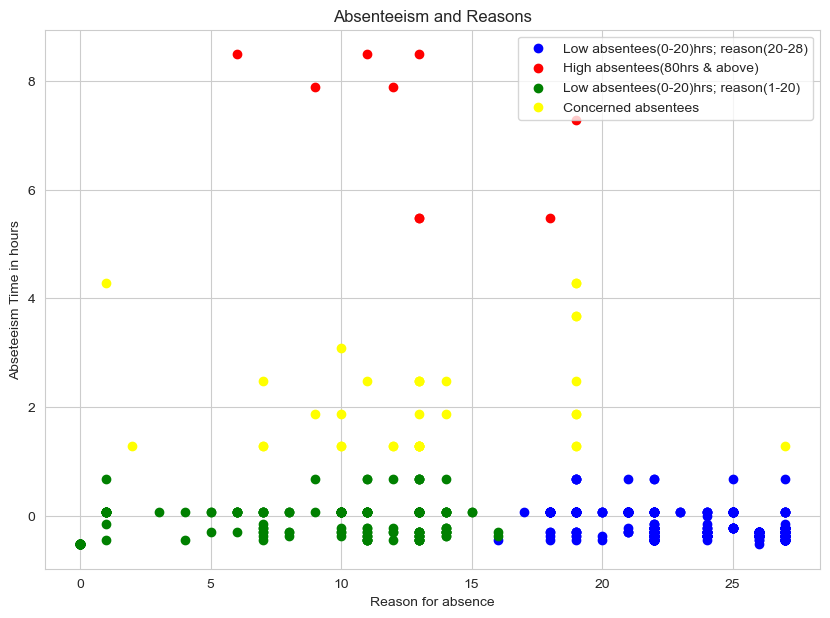

In [165]:
segments  = ["Low absentees(0-20)hrs; reason(20-28)","High absentees(80hrs & above)","Low absentees(0-20)hrs; reason(1-20)","Concerned absentees"]
plt.figure(figsize=(10,7))
mycolors = ["blue","red","green","yellow"]
for i in range(4):
    
    plt.scatter(x=df.loc[(df.km_clusters==i),'Reason for absence'],\
                y = df.loc[(df.km_clusters==i),'Absenteeism time in hours'],\
                c = mycolors[i],label=segments[i])
plt.title('Absenteeism and Reasons')
plt.xlabel('Reason for absence',)
plt.ylabel('Abseteeism Time in hours')
plt.legend(segments,loc='upper right')
plt.show()

# DBSCAN 

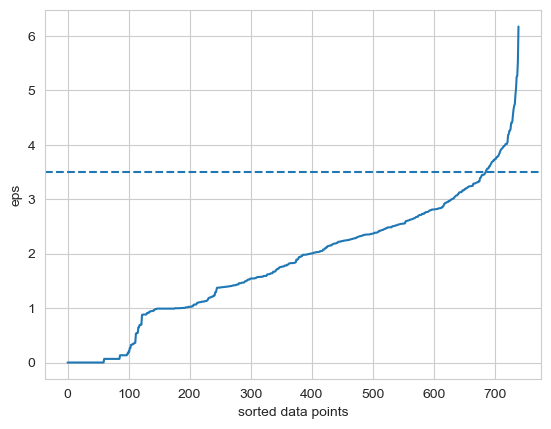

In [43]:
# Clustering based on feature selection using pca

nn = NearestNeighbors(n_neighbors=3)
neigh = nn.fit(pca_tr)

dist,ind = neigh.kneighbors(pca_tr)

dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist)
plt.axhline(y=3.5,linestyle='--')
plt.xlabel('sorted data points')
plt.ylabel('eps');

In [44]:
    db = DBSCAN(eps=3.5,min_samples=14)
    db_clusters = db.fit_predict(pca_tr)
    df["db_pca_clusters"] = db_clusters
    sil_score_pca = metrics.silhouette_score(pca_tr,db_clusters)
    print(sil_score_pca*100)

33.37507690863578


In [149]:
db_clusters

array([ 0, -1,  0, -1,  0,  0, -1,  0, -1,  0, -1, -1, -1, -1,  0, -1,  0,
        0, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0, -1,  0, -1, -1,  0, -1,
        0, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1, -1,
       -1,  0,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
       -1,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1,  0,
        0, -1, -1, -1,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1, -1,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1

**INTERPRETATION: Mostly value of cluster numbers are as -1 which means the algorithm is considering all datapoints as outliers and hence discarding the DBSCAN algorithm.**

# USER INPUT

In [171]:
k.value_counts()

0    492
2    204
3     35
1      9
dtype: int64

In [172]:
details = []

for abstime in range(0,50):
    abstime = int(input("Enter absentiseem time in hours: "))
    if abstime>=0 and abstime<=120:
        details.append(abstime)
        break
    else:
        print("Invalid entry. Please enter correct absentiseem time.")
        
print("-"*100)
        
for reason in range(0,50):
    print("Enter reason for absence no. from the following list:")
    print("1. Certain infectious and parasitic diseases ")
    print("2. Neoplasms")
    print("3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism ")
    print("4. Endocrine, nutritional and metabolic diseases ")
    print("5. Mental and behavioural disorders ")
    print("6. Diseases of the nervous system")  
    print("7. Diseases of the eye and adnexa")
    print("8. Diseases of the ear and mastoid process")
    print("9. Diseases of the circulatory system")
    print("10. Diseases of the respiratory system") 
    print("11. Diseases of the digestive system")
    print("12. Diseases of the skin and subcutaneous tissue")  
    print("13. Diseases of the musculoskeletal system and connective tissue")  
    print("14. Diseases of the genitourinary system")  
    print("15. Pregnancy, childbirth and the puerperium")  
    print("16. Certain conditions originating in the perinatal period")  
    print("17. Congenital malformations, deformations and chromosomal abnormalities")  
    print("18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified")  
    print("19. Injury, poisoning and certain other consequences of external causes")  
    print("20. External causes of morbidity and mortality")  
    print("21. Factors influencing health status and contact with health services")
    print("22. patient follow-up")
    print("23. medical consultation") 
    print("24. blood donation")
    print("25. laboratory examination") 
    print("26. unjustified absence") 
    print("27. physiotherapy")
    print("28. dental consultation")
    print("-"*100)
    reason = int(input("Enter absentiseem reason number: "))
    if reason>=0 and reason<=28:
        details.append(reason)
        break
    else:
        print("Invalid entry. Please enter correct absentiseem reason.")

                
details_tab = pd.DataFrame([details], columns=['Absenteeism time in hours','Reason for absence'])
details_tab = pd.concat([df2,details_tab], axis = 0)

print(" ")
print("*"*100)
print("Customer Details:")
print(details_tab.iloc[-1:,:].values.tolist())
    
for i in ["Absenteeism time in hours"]:
    details_tab[i] = sc.transform(details_tab[i].to_numpy().reshape(-1,1))
    
print(details_tab.iloc[-1:,:].values.tolist())
    
predict = details_tab.iloc[-1:,:]
print(" ")
print("*"*100)
print("*"*100)

if km_pca.predict(predict)==0:
    print("Employee belongs to Low absentees; reason(1-20)[GREEN ZONE]")
elif km_pca.predict(predict)==1:
    print("Employee belongs to High Absentees category[RED ZONE]")
elif km_pca.predict(predict)==2:
    print("Employee belongs to Low absentees; reason(20-28)[BLUE ZONE]")
else:
    print("Employee belongs to concerned category[YELLOW ZONE]")

Enter absentiseem time in hours: 120
----------------------------------------------------------------------------------------------------
Enter reason for absence no. from the following list:
1. Certain infectious and parasitic diseases 
2. Neoplasms
3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism 
4. Endocrine, nutritional and metabolic diseases 
5. Mental and behavioural disorders 
6. Diseases of the nervous system
7. Diseases of the eye and adnexa
8. Diseases of the ear and mastoid process
9. Diseases of the circulatory system
10. Diseases of the respiratory system
11. Diseases of the digestive system
12. Diseases of the skin and subcutaneous tissue
13. Diseases of the musculoskeletal system and connective tissue
14. Diseases of the genitourinary system
15. Pregnancy, childbirth and the puerperium
16. Certain conditions originating in the perinatal period
17. Congenital malformations, deformations and chromosomal abnormalities
1